
# Projeto Oficina Maker

## Estudantes: Felipe Ferro Ramires, Michael da Silva e Verônica Scheifer

## Análise de Dados e Modelagem

# **Importação**

In [ ]:
import numpy as np
import pandas as pd # importando o pandas para manipularmos o dataset
import seaborn as sns # importando o Seaborn para visualizar o comportamento dos dados
import matplotlib.pyplot as plt # importando o Matplotlib para o elbow method



from pandas_profiling import ProfileReport # importando o pandas-profiling para fazer o profile do dataset
from scipy import stats as sp
from sklearn.model_selection import train_test_split # utilizado para o split entre treinamento e teste
from sklearn.neighbors import KNeighborsRegressor # KNN para regressão
from sklearn.linear_model import LinearRegression # Regressão linear
from sklearn.svm import SVR # SVM para regressão
from sklearn.decomposition import PCA # PCA como aprendizagem não-supervisionada
from sklearn.preprocessing import RobustScaler # utilizado para que todas as entradas estejam na mesma escala numérica
from sklearn.preprocessing import StandardScaler
from pandas.core.frame import DataFrame
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/teste.csv', sep=';', encoding='ISO-8859-1') 

In [ ]:
df

,ATENDIMENTO_BAIRRO_NOME,NATUREZA1_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OCORRENCIA_DIA
0,CIDADE INDUSTRIAL,Alarmes,2009,QUINTA,15:14:00,1.0,1.0
1,FAZENDINHA,Roubo,2009,QUINTA,15:22:00,1.0,1.0
2,UBERABA,Animais,2009,QUINTA,15:59:00,1.0,1.0
3,SÍTIO CERCADO,Animais,2009,QUINTA,16:13:00,1.0,1.0
4,TATUQUARA,Alarmes,2009,QUINTA,16:29:00,1.0,1.0
...,...,...,...,...,...,...,...
249550,SÃO FRANCISCO,Trânsito,2019,QUINTA,05:15:00,8.0,1.0
249551,CENTRO,Fundada Suspeita (Abordagem),2019,QUINTA,07:15:00,8.0,1.0
249552,CIDADE INDUSTRIAL,Apoio,2019,QUINTA,07:15:00,8.0,1.0
249553,CENTRO,Fundada Suspeita (Abordagem),2019,QUINTA,07:35:00,8.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249555 entries, 0 to 249554
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ATENDIMENTO_BAIRRO_NOME  249410 non-null  object 
 1   NATUREZA1_DESCRICAO      249555 non-null  object 
 2   OCORRENCIA_ANO           249555 non-null  int64  
 3   OCORRENCIA_DIA_SEMANA    249555 non-null  object 
 4   OCORRENCIA_HORA          249555 non-null  object 
 5   OCORRENCIA_MES           249554 non-null  float64
 6   OCORRENCIA_DIA           249554 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.3+ MB


# **Informação do dataset**

In [ ]:
df['ATENDIMENTO_BAIRRO_NOME'].value_counts()

CENTRO                  38843
CIDADE INDUSTRIAL       17166
SÍTIO CERCADO           15471
CAJURU                  12581
BOQUEIRÃO               11464
                        ...  
CAMPO PEQUENO               1
VILA PERNETA                1
CAMPO DE SÃO BENEDIT        1
QUATRO BARRAS               1
PLANTA DEODORO              1
Name: ATENDIMENTO_BAIRRO_NOME, Length: 144, dtype: int64

In [ ]:
df['NATUREZA1_DESCRICAO'].value_counts()

Apoio                                37220
Dano                                 32576
Perturbação do sossego               18804
Roubo                                15559
Substância Ilícita                   15559
                                     ...  
Corrupção ativa                          1
Rompimento de Barragem                   1
Prostituição                             1
Acidente Viatura                         1
Falsificação de documento Publico        1
Name: NATUREZA1_DESCRICAO, Length: 165, dtype: int64

In [ ]:
df['OCORRENCIA_ANO'].value_counts()

2015    25566
2014    25303
2009    24903
2013    24470
2018    24153
2010    22531
2017    22137
2011    21484
2016    21469
2012    19776
2019    17763
Name: OCORRENCIA_ANO, dtype: int64

In [ ]:
df['OCORRENCIA_DIA_SEMANA'].value_counts()

SÁBADO     40386
DOMINGO    39905
SEXTA      36436
QUINTA     35361
QUARTA     33685
TERÇA      32323
SEGUNDA    31459
Name: OCORRENCIA_DIA_SEMANA, dtype: int64

In [ ]:
df['OCORRENCIA_MES'].value_counts()

5.0     23271
4.0     22481
3.0     22311
1.0     22208
7.0     21477
6.0     20608
2.0     20262
10.0    20180
8.0     19553
11.0    19434
9.0     18922
12.0    18847
Name: OCORRENCIA_MES, dtype: int64

In [ ]:
df['OCORRENCIA_HORA'].value_counts()

15:00:00    1690
16:00:00    1688
10:00:00    1455
14:00:00    1442
17:00:00    1425
            ... 
04:31:00      26
06:56:00      26
06:54:00      26
06:57:00      23
06:53:00      20
Name: OCORRENCIA_HORA, Length: 1440, dtype: int64

In [ ]:
df.describe()

,OCORRENCIA_ANO,OCORRENCIA_MES,OCORRENCIA_DIA
count,249555.000000,249554.000000,249554.000000
mean,2013.908754,6.324848,15.780681
std,3.113483,3.423156,8.789824
min,2009.000000,1.000000,1.000000
25%,2011.000000,3.000000,8.000000
50%,2014.000000,6.000000,16.000000
75%,2017.000000,9.000000,23.000000
max,2019.000000,12.000000,31.000000


In [ ]:
#.median() Função Pandas retorna a mediana dos valores para o eixo solicitado.
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


OCORRENCIA_ANO    2014.0
OCORRENCIA_MES       6.0
OCORRENCIA_DIA      16.0
dtype: float64

In [ ]:
#.var() calcula a variância no Pandas através da função
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


OCORRENCIA_ANO     9.693779
OCORRENCIA_MES    11.717994
OCORRENCIA_DIA    77.261000
dtype: float64

# **Tratamento de dados**

## *Limpando dados nulos*

In [ ]:
for col in df.columns:
 if df[col].isnull().sum():
  total_null=df[col].isnull().sum() 
  print('Column: {} total null {}, i.e. {} %'.format(col,total_null,round(total_null*100/len(df),2)))

Column: ATENDIMENTO_BAIRRO_NOME total null 145, i.e. 0.06 %
Column: OCORRENCIA_MES total null 1, i.e. 0.0 %
Column: OCORRENCIA_DIA total null 1, i.e. 0.0 %


In [ ]:
#Limpando dados nulos
df.dropna(inplace = True)
df.isnull().sum()

ATENDIMENTO_BAIRRO_NOME    0
NATUREZA1_DESCRICAO        0
OCORRENCIA_ANO             0
OCORRENCIA_DIA_SEMANA      0
OCORRENCIA_HORA            0
OCORRENCIA_MES             0
OCORRENCIA_DIA             0
dtype: int64

## *convertendo para int*

### *OCORRENCIA_HORA*

In [ ]:
 #converteu para datetime
 df['OCORRENCIA_HORA'] = pd.to_datetime(df['OCORRENCIA_HORA'])

In [ ]:
df['OCORRENCIA_HORA'].dt.time

0         15:14:00
1         15:22:00
2         15:59:00
3         16:13:00
4         16:29:00
            ...   
249549    03:20:00
249550    05:15:00
249551    07:15:00
249552    07:15:00
249553    07:35:00
Name: OCORRENCIA_HORA, Length: 249409, dtype: object

In [ ]:
 df['OCORRENCIA_HORA'] = df['OCORRENCIA_HORA'].dt.strftime('%H')

In [ ]:
df['OCORRENCIA_HORA'] = df['OCORRENCIA_HORA'].astype(str).astype(int)

In [ ]:
df['OCORRENCIA_HORA']

0         15
1         15
2         15
3         16
4         16
          ..
249549     3
249550     5
249551     7
249552     7
249553     7
Name: OCORRENCIA_HORA, Length: 249409, dtype: int64

### ATENDIMENTO_BAIRRO_NOME

In [ ]:
df['ATENDIMENTO_BAIRRO_NOME'] = df['ATENDIMENTO_BAIRRO_NOME'].replace({'CIDADE INDUSTRIAL':1, 'FAZENDINHA':2, 'UBERABA':3, 'SÍTIO CERCADO':4, 'TATUQUARA':5, 'SANTA CÂNDIDA':6, 'BOQUEIRÃO':7, 'CENTRO':8, 'BOA VISTA':9, 'TABOÃO':10, 'XAXIM':11, 'PILARZINHO':12, 'REBOUÇAS':13, 'ÁGUA VERDE':14, 'BATEL':15, 'NOVO MUNDO':16, 'ALTO BOQUEIRÃO':17, 'CAPÃO RASO':18, 'JARDIM BOTÂNICO':19, 'PORTÃO':20, 'ORLEANS':21, 'SANTA FELICIDADE':23, 'CASCATINHA':24, 'CAPÃO DA IMBUIA':25, 'BARREIRINHA':26, 'SEMINÁRIO':27, 'CAMPO COMPRIDO':28, 'PRADO VELHO':29, 'PINHEIRINHO':30, 'BUTIATUVINHA':31, 'CAMPINA DO SIQUEIRA':32, 'CAJURU':33, 'SÃO FRANCISCO':34, 'CENTRO CÍVICO':35, 'SÃO BRAZ':36, 'UMBARÁ':37, 'CAXIMBA':38, 'JARDIM SOCIAL':39, 'BACACHERI':40, 'CAMPO DE SANTANA':41, 'SANTO INÁCIO':42, 'JARDIM DAS AMÉRICAS':43, 'LINDÓIA':44, 'GANCHINHO':45, 'PAROLIN':46, 'ABRANCHES':47, 'SÃO JOÃO':48, 'ATUBA':49, 'TARUMÃ':50, 'ALTO DA RUA XV':51, 'MOSSUNGUÊ':52, 'TINGUI':53, 'BIGORRILHO':54, 'BAIRRO ALTO':55, 'HAUER':56, 'VILA IZABEL':57, 'CABRAL':58, 'BOM RETIRO':59, 'GUAÍRA':60, 'CACHOEIRA':61, 'AUGUSTA':62, 'CRISTO REI':63, 'AHÚ':64, 'ALTO DA GLÓRIA':65, 'GUABIROTUBA':66, 'MERCÊS':67, 'SANTA QUITÉRIA':68, 'SÃO MIGUEL':69, 'SÃO LOURENÇO':70, 'FANNY':71, 'JUVEVÊ':72, 'VISTA ALEGRE':73, 'HUGO LANGE':74, 'RIVIERA':75, 'LAMENHA PEQUENA':76, 'INDICAÇÕES CANCELADA':77, 'BAIRRO NAO INFORMADO':78, 'BAIRRO FICTÍCIO':79, 'fanny':80, 'TINGÜI':81, 'CIDADE JARDIM':82, 'VENEZA':83, 'PLANTA MEIRELES':84, 'TANGUA':85, 'MONTE REY':86, 'JD EUROPA':87, 'BORDA DO CAMPO':88, 'JARDIM BOA VISTA':89, 'SÃO JOSE':90, 'JARDIM COLONIAL':91, 'MENINO DEUS':92, 'SÃO JUDAS TADEU':93, 'VILA MARIA ANTONIETA':94, 'MARIA ANTONIETA':95, 'SANTO ANTONIO':96, 'COLOMBO':97, 'CANGUIRI':98, 'NÃO ENCONTRADO':99, 'FERRARIA':100, 'SÃO CRISTOVÃO':101, 'JD SUISSA':102, 'VILA FORMOSA':103, 'FORMOSO':104, 'SÃO PEDRO':105, 'SAO JOSE DOS PINHAIS':106, 'CAMPO PEQUENO':107, 'PINHAIS':108, 'VILA PERNETA ':109, 'SEM DADOS':110, 'CAMPO DE SÃO BENEDIT':111, 'QUATRO BARRAS':112, 'LOT. MARINONI':113, 'SÃO JORGE':114, 'BAIRRO NÃO LOCALIZAD':115, 'BRAGA':116, 'JARDIM LOANDA':117, 'NÃO INFORMADO ':118, 'SANTA TEREZINHA':119, 'SANTA TERESINHA':120, 'JARDIM WEISSOPOLIS':121, 'SITIO DAS PALMEIRAS':122, 'CAMPO PEQUENO ':123, 'NI':124, 'THOMAS COELHO':125, 'NF':126, 'SÃO THOMAS':127, 'JARDIM INDUSTRIAL':128, 'ROÇA NEGRA':129, 'SÃO THOMAZ':130, 'GRALHA AZUL':131, 'MARACANÃ':132, 'VILA BANCÁRIA':133, 'JARDIM BOM PASTOR':134, 'SAO GERONIMO':135, 'RIO VERDE':136, 'JD IPE':137, 'IGUAÇÚ 1':138, 'AGUAS BELAS':139, 'ÁGUAS BELAS':140, 'IGUAÇU 01':141, 'ESTADOS':142, 'CIC':143, 'JR TAISA':144, 'PLANTA DEODORO':145, 'MAUA':146, 'COLONIA FARIA':147, 'NAÇÕES':148, 'JARDIM SANTA MÔNICA':149, 'LOTEAMENTO SÃO GERÔN':150, 'TAMANDARE ':151, 'CAMPO LARGO':152, 'BOQUEIRÃO ':153, 'JARDIM BELA VISTA':154, 'ESTANCIA PINHAIS ':155, 'COLONIA SAO VENANCIO':156, 'FRANCISCO GORSKI':157, 'OSASCO':158, 'BARIGUI':159, 'GUATUPE ':160, 'PARQUE DAS NASCENTES':161, 'CENTRO ':162, 'JD. ORESTES THÁ':163, 'PARQUE DAS FONTES':164, 'PINEVILLE':165, 'BORDA DO CAMPO ':166, ' JARDIM OSASCO':167, 'JARDIM PRIMAVERA':168, 'JD DONA BELIZARIA':169, 'PIRAQUARA':170, 'JARDIM RAFAELA':171, 'BARRO PRETO':172, 'BELAS AGUAS':173, 'EUCALIPTOS':174, 'VILA GRAZIELA':175, 'CIDADE INDUSTRIAL DE':178, 'AFONSO PENA':179, 'PALMEIRINHA':180, 'IPE 2':181, 'SANTA MONICA':182, 'GUATUPE':183, 'AFONSO PENA ':184, 'SAO SEBASTIAO':185, 'MAUÁ':186, 'SÃO GERONIMO':187, 'OURO FINO':188, 'SANTO ANTÔNIO':189, 'CAMPINHA GRANDE DO S':190, ' JARDIM PEDRO DEMETE':191, 'ROÇA GRANDE':192, 'TINDIQUERA':193, 'SÃO BENEDITO':194}) 

In [ ]:
df['ATENDIMENTO_BAIRRO_NOME'] = df['ATENDIMENTO_BAIRRO_NOME'].astype(str).astype(int)

### NATUREZA1_DESCRICAO

In [ ]:
df['NATUREZA1_DESCRICAO'] = df['NATUREZA1_DESCRICAO'].replace({'Apoio':1, 'Alarmes':2, 'Invasão':3, 'Vistoria':4, 'Roubo':5, 'Perturbação do sossego':6, 'Trânsito':7, 'Risco de acidente/à vida (Defesa Civil)':8, 'Violação de Medida Protetiva Lei Maria da Penha':9, 'Dano':10, 'Lesão Corporal':11, 'Fundada Suspeita (Abordagem)':12, 'Substância Ilícita':13, 'Orientação':14, 'Alagamento':15, 'Animais':16, 'Furto':17, 'Desinteligência':18, 'Patrulha Maria da Penha':19, 'Atitude Suspeita':20, 'Atos obscenos/libidinosos':21, 'Vias de fato':22, 'Queima a céu aberto':23, 'Ameaça':24, 'Averiguação':25, 'Encaminhamento':26, 'Estupro':27, 'Saturação':28, 'Agressão física/verbal':29, 'AIFU':30, 'Escolta':31, 'Incêndio':32, 'Risco de acidente / à vida':33, 'Desacato':34, 'Paciente/usuário alterado':35, 'Veículo':36, 'Pesca em local proibido':37, 'Ronda':38, 'Destelhamento':39, 'Construção Irregular':40, 'Crime ambiental':41, 'Risco de desabamento / desmoronamento':42, 'Tentativa':43, 'Fornecimento de Lona':44, 'Suicídio':45, 'Obstrução de via':46, 'Substância Lícita':47, 'Depósito irregular':48, 'Corte irregular de árvore':49, 'Achado':50, 'Queda de árvore':51, 'Disparo de arma':52, 'Órgãos acionados':53, 'Averiguação (Defesa Civil)':54, 'Antecedentes Criminais - Verificação':55, 'Injúria':56, 'Desaparecimento':57, 'Manifestação':58, 'Seqüestro e cárcere privado':59, 'Arrastão':60, 'Deslizamenton de Terra':61, 'ZELADORIA URBANA':62, 'Desabamento':63, 'Devolução de coisa achada':64, 'Conduta inconveniente':65, 'Uso indevido do cartão transporte':66, 'Maus tratos à pessoas':67, 'Extravio de Equipamento':68, 'Porte Ilegal':69, 'Rixa':70, 'Erosão':71, 'Importunação\xa0sexual':72, 'Situação de risco':73, 'Queda de fios de energia':74, 'Estelionato':75, 'Desobediência':76, 'Racismo':77, 'Homicídio':78, 'Queda de galho':79, 'Homofobia':80, 'Descumprimento lei 15799/2021 COVID-19':81, 'Fuga de aluno/interno':82, 'Menores abordando transeuntes':83, 'Abandono de incapaz':84, 'Risco de queda de árvore':85, 'Retirada de invasão':86, 'Banho em local impróprio':87, 'Abuso de incapazes':88, 'Contrabando ou descaminho':89, 'Criança perdida/desaparecida':90, 'Extravio, sonegação ou inutilização de livro ou doc.':91, 'Resistência':92, 'Aliciamento de menor':93, 'Apropriação indébita':94, 'Proteção ao patrimônio':95, 'Infiltração':96, 'Roubo, furto, extravio, recuperação, apreensão de armas de fogo.':97, 'Receptação':98, 'Ataque de insetos':99, 'Fiscalizações e Orientações':100, 'Vazamento ou derramamento de Produto Perigoso ou Infectante':101, 'Falsidade ideológica (Falsa Identidade)':102, 'Câmera Off-Line':103, 'Poluição visual/ambiental':104, 'Óbito':105, 'Avaria em Equipamento/Patrimônio (não intencional)':106, 'Fuga de paciente':107, 'Moeda Falsa':108, 'Embriaguez':109, 'Queda de poste':110, 'Material abandonado':111, 'Calote':112, 'Quedas de objetos ou partes de construções':113, 'Acidente Viatura':114, 'Risco de queda de poste':105, 'Constrangimento ilegal':106, 'Comércio ambulante':107, 'Usar de uniforme, ou distintivo de função pública que não exerce':108, 'Envenenamento':109, 'Denúncia de bomba':110, 'Mendigar, por ociosidade ou cupidez':111, 'Extorsão':112, 'Atentado violento ao pudor':113, 'Verificação':114, 'Pragas Animais':115, 'Inundação/Enchente':116, 'Importunação ofensiva ao pudor':117, 'Jogo de Azar':118, 'Porte de artefato explosivo':119, 'Maus tratos a animais':120, 'Calúnia':121, 'Sedução':122, 'Violência arbitrária':123, 'Afogamento':124, 'Explosão':125, 'Câmeras de videomonitoramento':126, 'Bueiro aberto/sem tampa':127, 'Menor gazeando aula':128, 'Fornecimento de bebida alcoólica à menores':129, 'Vadiagem':130, 'Discriminação':131, 'Escrito ou objeto obsceno (panfletos pornográficos)':132, 'Favorecimento da prostituição':133, 'Peculato':134, 'Impedimento ou perturbação de cerimônia funerária':135, 'Risco de queda de fios de energia':136, 'Ataque cão feroz':137, 'Abandono de função':138, 'Uso indevido do telefone público':139, 'Aterro irregular':140, 'Risco de explosão':141, 'Obstrução da Atividade Policial':142, 'Bueiro entupido':143, 'Corrupção de menores':144, 'Queda de aeronave':145, 'Incendio/Explosão em edificação':146, 'Vilipêndio a cadáver':147, 'Risco de queda de galho':148, 'Prostituição':149, 'Violação de sepultura/túmulo':150, 'Fingir-se funcionário público':151, 'Trote Telefonico':152, 'Apologia de crime ou criminoso':153, 'Falsificação de documento Publico':154, 'Denuncia Improcedente':155, 'Quadrilha ou bando':156, 'Desabamento de Telhado/Cobertura':157, 'Exploração de menores':158, 'Queda de Muro':159, 'Abalo Sísmico':160, 'Omissão de socorro':161, 'Rompimento de Barragem':162, 'Liberação de pessoa presa/apreendida por recusa no recebimento pela DP':163, 'Venda proibida de produtos específicos à menores':164, 'Concussão':165, 'Charlatanismo':166, 'Difamação':167, 'RECUSAR SE IDENTIFICAR AO POLICIAL':168, 'Perseguição (stalking)':169, 'Enxurrada':170, 'Rufianismo':171, 'Incitação ao crime':172, 'Averiguação (COSEDI)':173, 'Queda de Revestimento de Fachadas':174, 'Corrupção ativa':175, 'Óbito (Defesa Civil)':176, 'Prevaricação':177}) 

In [ ]:
df['NATUREZA1_DESCRICAO'] = df['NATUREZA1_DESCRICAO'].astype(str).astype(int)

### OCORRENCIA_DIA_SEMANA

In [ ]:
df['OCORRENCIA_DIA_SEMANA'] = df['OCORRENCIA_DIA_SEMANA'].replace({'DOMINGO':1, 'SEGUNDA':2, 'TERÇA':3, 'QUARTA':4, 'QUINTA':5, 'SEXTA':6, 'SÁBADO':7}) 

In [ ]:
df['OCORRENCIA_DIA_SEMANA'] = df['OCORRENCIA_DIA_SEMANA'].astype(str).astype(int)

In [ ]:
#.std() calcula o desvio padrão das colunas ou linhas numéricas
df.std()

ATENDIMENTO_BAIRRO_NOME    19.326657
NATUREZA1_DESCRICAO        16.781344
OCORRENCIA_ANO              3.113925
OCORRENCIA_DIA_SEMANA       2.062074
OCORRENCIA_HORA             6.611766
OCORRENCIA_MES              3.423113
OCORRENCIA_DIA              8.789952
dtype: float64

# **Visualizações dos dados**

In [ ]:
pd.set_option("display.float_format", lambda x: "%.0f" % x)

**Qual ano possui mais atendimento?**

<Figure size 1440x1440 with 0 Axes>

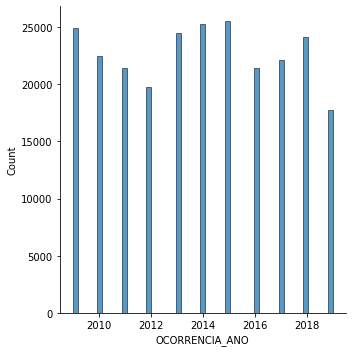

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df,  x='OCORRENCIA_ANO')

Resposta: 2021, 2020 e 2022

**Qual bairro possui mais atendimento?**

<Figure size 720x720 with 0 Axes>

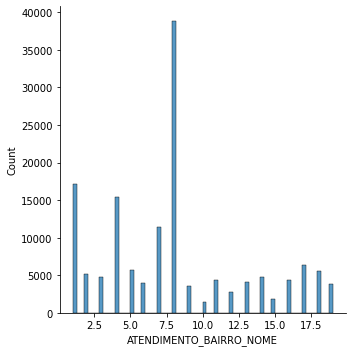

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],  x='ATENDIMENTO_BAIRRO_NOME')

Resposta: 8: Centro, 1: CIC e 4: SÍTIO CERCADO

**Qual ano por bairro possui mais atendimento?**

<Figure size 7200x5760 with 0 Axes>

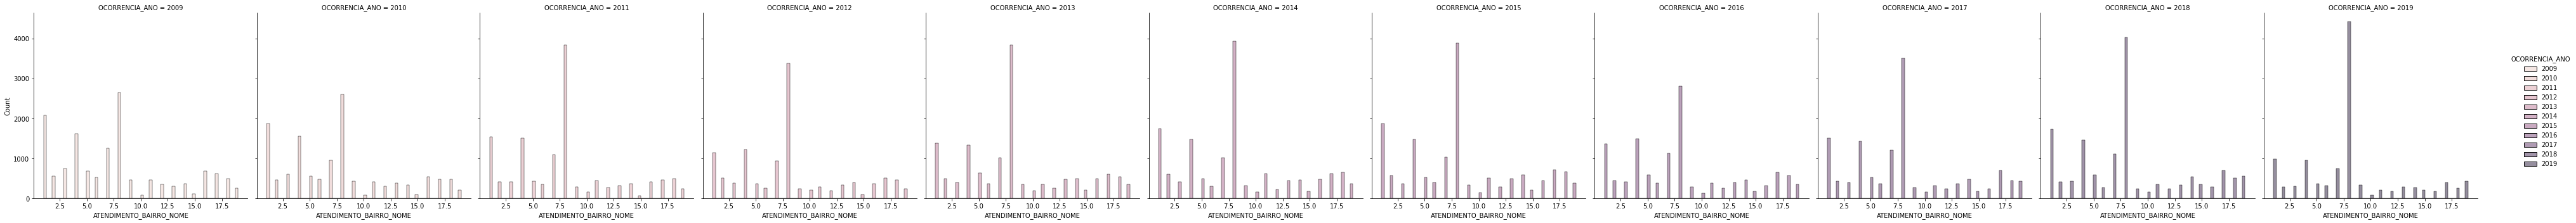

In [ ]:
plt.figure(figsize=(100,80))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],  x='ATENDIMENTO_BAIRRO_NOME', hue='OCORRENCIA_ANO', col='OCORRENCIA_ANO', color='red')

Resposta: 

`2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018 e 2019;`
*   1ºlugar: 8, Centro. 
*   2ºlugar: 1, CIC.
*   3ºlugar: 4: SÍTIO CERCADO.


`2020: `
*   1ºlugar: 8, Centro. 
*   2ºlugar: 4: SÍTIO CERCADO.
*   3ºlugar: 1, CIC.

`2021: 2022`
*   1ºlugar: 8, Centro. 
*   2ºlugar: 1, CIC.
*   3ºlugar: 4: SÍTIO CERCADO.



**Qual o tipo de natureza da ocorrência?**

<Figure size 1440x1440 with 0 Axes>

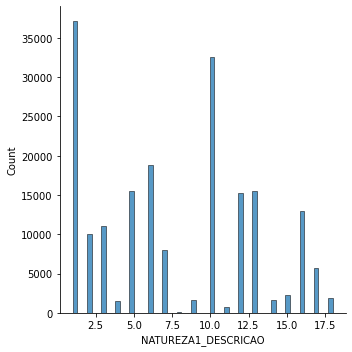

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df[df['NATUREZA1_DESCRICAO']<20],  x='NATUREZA1_DESCRICAO')

Resposta: 1: Apoio, 12: Fundada Suspeita (Abordagem) e 10: Dano

**Qual o tipo de natureza da ocorrência em cada bairro?** 

(1.0, 20.0)

<Figure size 1440x1440 with 0 Axes>

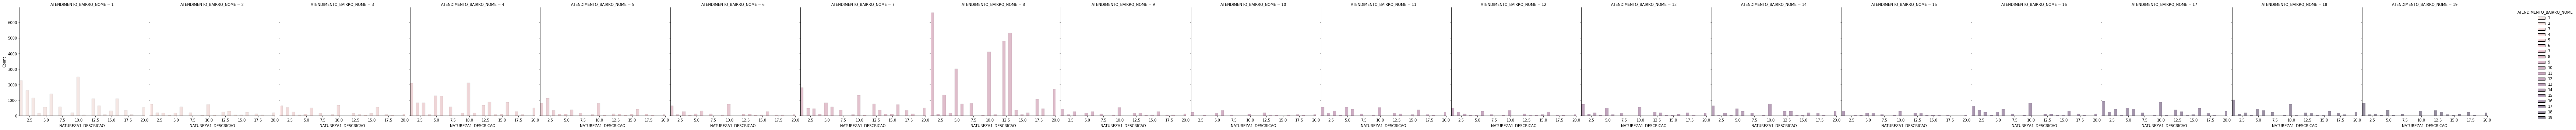

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],   x='NATUREZA1_DESCRICAO', hue='ATENDIMENTO_BAIRRO_NOME', col='ATENDIMENTO_BAIRRO_NOME', color=['black'])
plt.xlim(1,20)

Resposta: foram utilizado so os 20 tipo de ATENDIMENTO_BAIRRO_NOME e ATENDIMENTO_BAIRRO_NOMe, que se tem mais registro.

**Qual horário da ocorrência mais frequente?**

<Figure size 1440x1440 with 0 Axes>

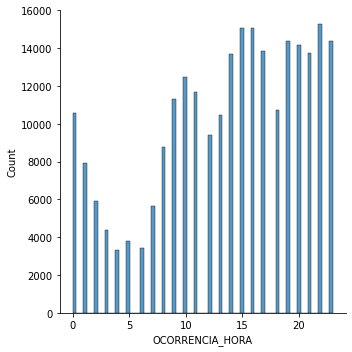

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df,  x='OCORRENCIA_HORA')

Resposta: 15 14 e 16

**Qual horário mas a semana mais frequente?**

<Figure size 1440x1440 with 0 Axes>

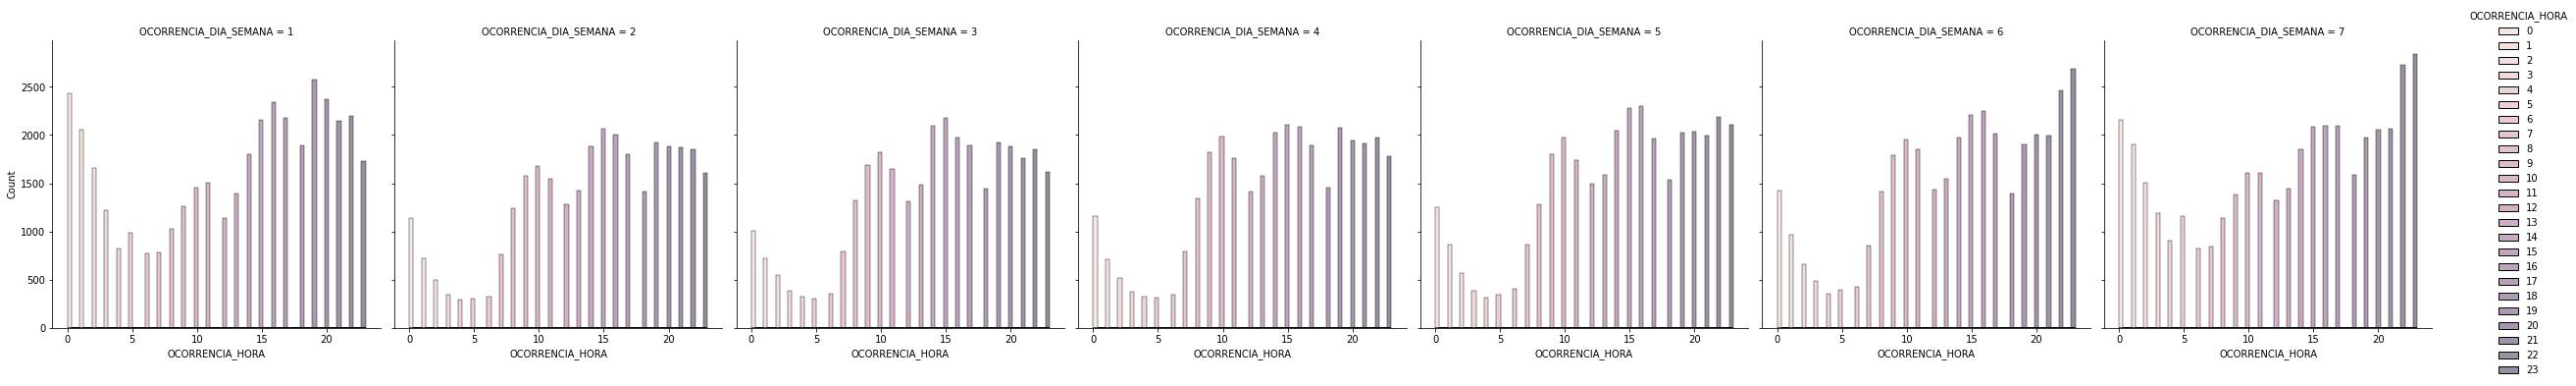

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df,  x='OCORRENCIA_HORA', hue='OCORRENCIA_HORA', col='OCORRENCIA_DIA_SEMANA')

Resposta: final de semana a mais ocorrencia a tarde, 13h ate umas 20h

**Qual horário mais a semana e o bairro mais frequentes?**

<Figure size 1440x1440 with 0 Axes>

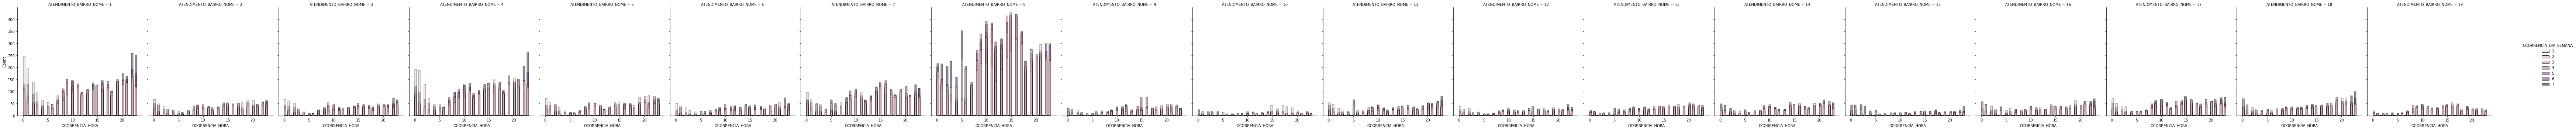

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df[df['ATENDIMENTO_BAIRRO_NOME']<20],  x='OCORRENCIA_HORA', hue='OCORRENCIA_DIA_SEMANA', col='ATENDIMENTO_BAIRRO_NOME', color=['black'])

Resposta: Bairro 8, centro tem mais registro de manha e a tarde ja 1, CIC e 4 SÍTIO CERCADO, se mantem igual com descanso so na madrugada

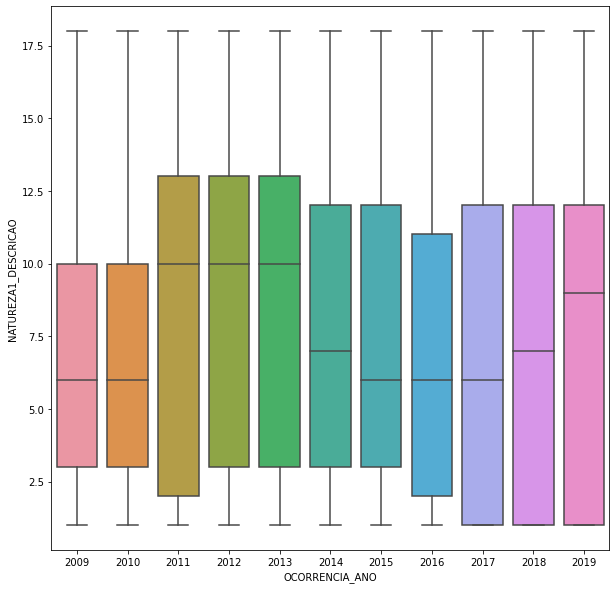

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[df['NATUREZA1_DESCRICAO']<20],   x='OCORRENCIA_ANO', y='NATUREZA1_DESCRICAO')

# **Teste Modelagem**

In [ ]:
# split entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('ATENDIMENTO_BAIRRO_NOME', axis=1), # aqui informamos os atributos
                                                                        df['ATENDIMENTO_BAIRRO_NOME'], # aqui informamos as labels e na mesma ordem dos atributos
                                                                        test_size=0.20, # informamos a porcentagem de divisão da base. Geralmente é algo entre 20% (0.20) a 35% (0.35)
                                                                        random_state=0) # aqui informamos um "seed". É um valor aleatório e usado para que alguns algoritmos i

In [ ]:
modelo_knn = KNeighborsRegressor().fit(X_train, y_train)
modelo_knn.score(X_test, y_test)

-0.16582314950613508